# Clustering

En este tutorial aprenderemos a trabajar t√©cnicas de clustering. En el tutorial veremos distintos modelos:
- Basados en particiones: K-Medias, K-medoids.
- M√©todos jer√°rquicos.
- Basados en densidad: DBSCAN
- An√°lisis de Componentes Princiales y Clustering
- Basados en distribuciones: GMMs



# Kmeans

En este ejemplo, vamos a generar un conjunto de muestras aleatorias. Comenzamos a generar estos datos

In [2]:
# Para KMedoids
!pip install scikit-learn-extra

   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/340.5 kB 653.6 kB/s eta 0:00:01
   --------------------------------- ------ 286.7/340.5 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 340.5/340.5 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Nata\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gr√°ficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, silhouette_samples

# Configuraci√≥n warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Simulaci√≥n de datos
# ==============================================================================
X, y = make_blobs(
    n_samples    = 300,
    n_features   = 2,
    centers      = 4,
    cluster_std  = 0.60,
    shuffle      = True,
    random_state = 0
)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black',
)
ax.set_title('Datos simulados');

La implementaci√≥n de `sklearn.cluster.KMeans` tiene los siguientes par√°metros:
- `n_clusters`: determina el n√∫mero *ùêæ* de clusters que se van a generar.
- `init`: estrategia para asignar los centroides iniciales. Por defecto se emplea 'k-means++', una estrategia que trata de alejar los centroides lo m√°ximo posible facilitando la convergencia. Sin embargo, esta estrategia puede ralentizar el proceso cuando hay muchos datos, si esto ocurre, es mejor utilizar 'random'.
- `n_init`: determina el n√∫mero de veces que se va a repetir el proceso, cada vez con una asignaci√≥n aleatoria inicial distinta. Es recomendable que este √∫ltimo valor sea alto, entre 10-25, para no obtener resultados sub√≥ptimos debido a una iniciaci√≥n poco afortunada del proceso.
- `max_iter`: n√∫mero m√°ximo de iteraciones permitidas.
- `random_state`: semilla para garantizar la reproducibilidad de los resultados.

In [5]:
# Escalado de datos
# ==============================================================================
X_scaled = scale(X)

In [6]:
# Modelo
# ==============================================================================
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=42)
modelo_kmeans.fit(X=X_scaled)

KMeans(n_clusters=4, n_init=25, random_state=42)

El objeto devuelto por `KMeans()` contiene entre otros datos: la media de cada una de las variables para cada cluster (`cluster_centers_`), es decir, los centroides. Un vector indicando a qu√© cluster se ha asignado cada observaci√≥n (`.labels_`) y la suma total de cuadrados internos de todos los clusters (`.inertia_`).

Vamos a pintar como nos quedan los clusters

In [7]:
# Clasificaci√≥n con el modelo kmeans
# ==============================================================================
y_predict = modelo_kmeans.predict(X=X_scaled)

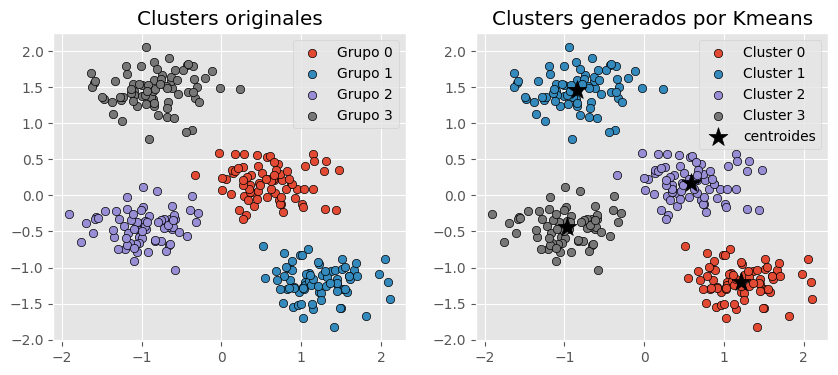

In [8]:
# Representaci√≥n gr√°fica: grupos originales vs clusters creados
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax[0].set_title('Clusters originales')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

Podemos ver tambi√©n el n√∫mero de aciertos y errores. Podemos verlo como una matriz de confusi√≥n. Aqu√≠ hay que tener cuidado que Kmeans asigna un cluster cuyo n√∫mero puede ser distinto. Por lo tanto, cada fila tiene que tener un n√∫mero alto (aciertos) y en las dem√°s posiciones valores bajos (errores de clasificaci√≥n)

In [9]:
# Matriz de confusi√≥n: grupos originales vs clusters creados
# ==============================================================================
pd.crosstab(y, y_predict, dropna=False, rownames=['grupo_real'], colnames=['cluster'])

cluster      0   1   2   3
grupo_real                
0            0   0  75   0
1           75   0   0   0
2            0   0   0  75
3            0  75   0   0

Vamos a ver que pasar√≠a si en vez de decirle a KMeans que son 4 clusters, le decimos que K=2 √≥ K=6

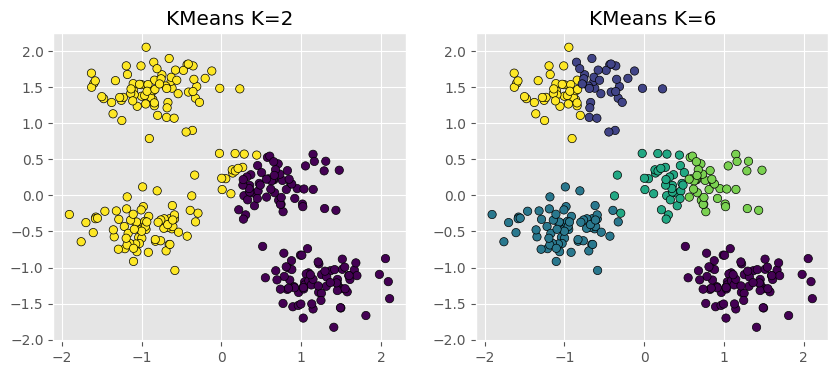

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(n_clusters=2, n_init=25, random_state=42).fit_predict(X=X_scaled)
ax[0].scatter(
    x = X_scaled[:, 0],
    y = X_scaled[:, 1],
    c = y_predict,
    #cmap='viridis',
    marker    = 'o',
    edgecolor = 'black'
)
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=6, n_init=25, random_state=42).fit_predict(X=X_scaled)
ax[1].scatter(
    x = X_scaled[:, 0],
    y = X_scaled[:, 1],
    c = y_predict,
    #cmap='viridis',
    marker    = 'o',
    edgecolor = 'black'
)
ax[1].set_title('KMeans K=6');

## N√∫mero de clusters

### M√©todo del codo (Elbow method)
La soluci√≥n al problema anterior es hacer una b√∫squeda de cual ser√≠a el K mejor. La idea es obtener para valor de K la suma de los cuadrados de la distancia de cada punto con el centroide al que se encuentra asignado (se obtiene de `.inertia_`). Es una medida de lo coherentes que son internamente los clusters. La idea es que si K crece el valor de `.inertia_` es menor porque cada cluster es m√°s peque√±o. Sin embargo, a partir de cierto punto, la adici√≥n de m√°s clusters proporciona rendimientos decrecientes en t√©rminos de reducci√≥n de `.inertia_`, y la tasa de disminuci√≥n se ralentiza, formando un codo en el gr√°fico. Ese ser√≠a el valor √≥ptimo para seleccionar.

In [11]:
# M√©todo elbow para identificar el n√∫mero √≥ptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 42
    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evoluci√≥n de la varianza intra-cluster total")
ax.set_xlabel('N√∫mero clusters')
ax.set_ylabel('Intra-cluster (inertia)');

Vemos como el valor √≥ptimo es K=4, como ya sab√≠amos.

### M√©todo Silhouette
Algunas veces, con el m√©todo Elbow es dif√≠cil determinar en n√∫mero √≥ptimo de clusters. Otra aproximaci√≥n es el m√©todo Silhouette. Utiliza la distancia media intracl√∫ster y la distancia media cl√∫ster m√°s cercano para cada muestra. Cuanto mayor sea el valor de la puntuaci√≥n, mejor ser√° la estimaci√≥n. Normalmente, las puntuaciones de silhoutte suben y luego bajan hasta alcanzar un n√∫mero √≥ptimo de clusters. Los valores se sit√∫an entre -1,0 y 1,0.

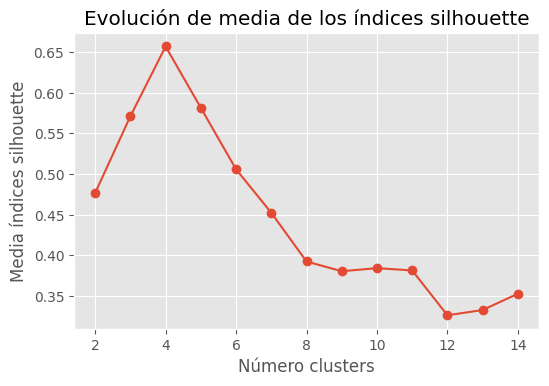

In [12]:
# M√©todo silhouette para identificar el n√∫mero √≥ptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 42
    )
    cluster_labels = modelo_kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evoluci√≥n de media de los √≠ndices silhouette")
ax.set_xlabel('N√∫mero clusters')
ax.set_ylabel('Media √≠ndices silhouette');

Podemos tambi√©n dibujar los gr√°ficos de silhouette para un conjunto de clusters. Los gr√°ficos los haremos para 2, 3, 4, 5, y 6.

In [ ]:
# Gr√°ficos silhouette para identificar el n√∫mero √≥ptimo de clusters
# ==============================================================================

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Crear un subplot con 1 fila y dos columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # El primer subplot es el gr√°fico silhouette
    # El coeficiente de silhouette puede oscilar entre -1, 1 pero en este ejemplo
    # todos se encuentran dentro de [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # El (n_clusters+1)*10 sirve para insertar un espacio en blanco entre los
    # gr√°ficos de silhouette de los clusters individuales, para delimitarlos claramente.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Inicializar el clusterer con n_clusters valor y un generador aleatorio
    # aleatorio de 42 para la reproducibilidad.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # El silhouette_score da el valor medio de todas las muestras. Esto da una
    # perspectiva de la densidad y separaci√≥n de los clusters formados
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        "La media de silhouette_score es :",
        silhouette_avg,
    )

    # Calcular las puntuaciones de silhouette de cada muestra
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agregar las puntuaciones de silhouette de las muestras pertenecientes al
        # cluster i, y ord√©nelas
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Etiquetar los gr√°ficos de silhouette con sus n√∫meros de cluster en el
        # centro.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcular el nuevo y_lower para el siguiente gr√°fico
        y_lower = y_upper + 10

    ax1.set_title("El gr√°fico silhouette para varios clusters.")
    ax1.set_xlabel("Los valores del coeficiente de silueta")
    ax1.set_ylabel("Etiqueta del cluster")

    # La l√≠nea vertical para la puntuaci√≥n media de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # El segundo plot dibuja los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Etiquetando los clusters
    centers = clusterer.cluster_centers_
    # Dibujar c√≠rculos blancos en los centros de los clusters
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualizaci√≥n de los datos clusterizados.")
    ax2.set_xlabel("Espacio de caracter√≠sticas para la 1¬™ caracter√≠stica")
    ax2.set_ylabel("Espacio de caracter√≠sticas para la 2¬™ caracter√≠stica")

    plt.suptitle(
        "An√°lisis silhouette para la agrupaci√≥n KMeans en datos de muestra con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

En este ejemplo se utiliza el an√°lisis de silhouette para elegir un valor √≥ptimo para n_clusters. El gr√°fico de silhouette muestra que los valores n_clusters de 3, 5 y 6 son una mala elecci√≥n para los datos dados debido a la presencia de clusters con puntuaciones de silueta por debajo de la media y tambi√©n debido a las amplias fluctuaciones en el tama√±o de los gr√°ficos de silhouette. El an√°lisis de siluetas es m√°s ambivalente a la hora de decidir entre 2 y 4.

Tambi√©n se puede visualizar el tama√±o del conglomerado a partir del grosor del gr√°fico de silhouette. El gr√°fico de silhouette del cluster 0 cuando n_clusters es igual a 2, es m√°s grande debido a la agrupaci√≥n de los 3 subclusters en un cluster grande. Sin embargo, cuando n_clusters es igual a 4, todos los gr√°ficos tienen m√°s o menos el mismo grosor y, por lo tanto, el mismo tama√±o, como puede comprobarse en el gr√°fico de dispersi√≥n etiquetado en t


# K-medoids
El m√©todo KMeans es bastante sensible a outliers. El algoritmo K-medoids es similar al de KMeans. En este caso, en vez de usar el centroide del cluster como representante, se utiliza una muestra presente en el cluster. Esta muestra se conoce como *medoid* y es el elemento dentro de un cluster cuya distancia (diferencia) promedio entre √©l y todos los dem√°s elementos del mismo cluster es lo menor posible. Es decir, el elemento central del cluster.

Para instalar scikit-learn-extra


`!pip install scikit-learn-extra`

In [ ]:
# Lo hemos instalado al principio
# !pip install scikit-learn-extra

In [ ]:
modelo_kmedoids = KMedoids(n_clusters=4, random_state=42)
modelo_kmedoids.fit(X=X_scaled)

In [ ]:
# Clasificaci√≥n con el modelo kmedoids
# ==============================================================================
y_predict = modelo_kmedoids.predict(X=X_scaled)

In [ ]:
# Representaci√≥n gr√°fica: grupos originales vs clusters creados
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax[0].set_title('Clusters originales')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

ax[1].scatter(
    x = modelo_kmedoids.cluster_centers_[:, 0],
    y = modelo_kmedoids.cluster_centers_[:, 1],
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'medoids'
)
ax[1].set_title('Clusters generados por Kmedoids')
ax[1].legend();

# Cluster jer√°rquico

Usaremos el dataset USArrests que contiene estad√≠sticas sobre arrestos por cada 100,000 residentes por asalto, asesinato y violaci√≥n en cada uno de los 50 estados de EE. UU. en 1973. Tambi√©n se da el porcentaje de la poblaci√≥n que vive en √°reas urbanas.

In [21]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

# Gr√°ficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Configuraci√≥n warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Datos

In [ ]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
USArrests['StateAbbrv'] = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT","DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ","NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC","SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

datos = USArrests.data
datos.head(4)

Los escalamos

In [ ]:
# Escalado de las variables
# ==============================================================================
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True)
datos_scaled = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled.head(4)

In [ ]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta funci√≥n extrae la informaci√≥n de un modelo AgglomerativeClustering
    y representa su dendograma con la funci√≥n dendogram de scipy.cluster.hierarchy
    '''

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

Los par√°metros de la clase `sklearn.cluster.AgglomerativeClustering` que destacan:

- `n_clusters`: determina el n√∫mero de clusters que se van a generar. En su lugar, su valor puede ser None si se quiere utilizar el criterio `distance_threshold` para crear los clusters o crecer todo el dendograma.
- `distance_threshold`: distancia (altura del dendograma) a partir de la cual se dejan de unir los clusters. Indicar `distance_threshold=0` para crecer todo el √°rbol.
- `compute_full_tree`: si se calcula la jerarqu√≠a completa de clusters. Debe ser `True` si `distance_threshold` es distinto de `None`.
- `affinity`: m√©trica utilizada como distancia. Puede ser: ‚Äúeuclidean‚Äù, ‚Äúl1‚Äù, ‚Äúl2‚Äù, ‚Äúmanhattan‚Äù, ‚Äúcosine‚Äù, or ‚Äúprecomputed‚Äù. Si se utiliza `linkage=‚Äúward‚Äù`, solo se permite ‚Äúeuclidean‚Äù.
- `linkage: tipo de linkage utilizado. Puede ser ‚Äúward‚Äù, ‚Äúcomplete‚Äù, ‚Äúaverage‚Äù o ‚Äúsingle‚Äù.

Al aplicar un hierarchical clustering aglomerativo se tiene que escoger una medida de distancia y un tipo de linkage. El concepto de linkage contempla la forma que tenemos de medir la distancia entre pares de grupos. Tenemos varias formas:
- `"ward"`. La elecci√≥n de los pares de clusters que se fusionan en cada etapa del *agglomerative hierarchical clustering* se fundamenta en el valor √≥ptimo de una funci√≥n objetivo, la cual puede ser cualquier funci√≥n determinada por el analista. El m√©todo de *Ward's minimum variance* es un ejemplo espec√≠fico en el cual el prop√≥sito es reducir al m√≠nimo la suma total de la varianza intra-cluster. Durante cada fase, se identifican aquellos 2 clusters cuya fusi√≥n resulta en el menor aumento de la varianza total intra-cluster. Este indicador es an√°logo a la m√©trica que se busca minimizar en el algoritmo K-means.
- `"complete"`. Se calcula la distancia entre todos los posibles pares formados por una observaci√≥n del cluster A y una del cluster B. La mayor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida m√°s conservadora
- `"average"`. Se calcula la distancia entre todos los posibles pares formados por una observaci√≥n del cluster A y una del cluster B. El valor promedio de todas ellas se selecciona como la distancia entre los dos clusters.
- `"single"`.Se calcula la distancia entre todos los posibles pares formados por una observaci√≥n del cluster A y una del cluster B. La menor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida menos conservadora

A continuaci√≥n, se comparan los resultados con los linkages complete, ward y average, utilizando la distancia eucl√≠dea como m√©trica de similitud.

In [ ]:
# Modelos
# ==============================================================================
modelo_hclust_complete = AgglomerativeClustering(
    affinity = 'euclidean',
    linkage  = 'complete',
    distance_threshold = 0,
    n_clusters         = None
)
modelo_hclust_complete.fit(X=datos_scaled)

modelo_hclust_average = AgglomerativeClustering(
    affinity = 'euclidean',
    linkage  = 'average',
    distance_threshold = 0,
    n_clusters         = None
)
modelo_hclust_average.fit(X=datos_scaled)

modelo_hclust_ward = AgglomerativeClustering(
    affinity = 'euclidean',
    linkage  = 'ward',
    distance_threshold = 0,
    n_clusters         = None
)
modelo_hclust_ward.fit(X=datos_scaled)

In [ ]:
# Dendrogramas
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(modelo_hclust_average, labels=datos_scaled.index, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia eucl√≠dea, Linkage average")
plot_dendrogram(modelo_hclust_complete, labels=datos_scaled.index, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia eucl√≠dea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, labels=datos_scaled.index, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia eucl√≠dea, Linkage ward")
plt.tight_layout();

## N√∫mero de clusters
Una forma de decidir el n√∫mero de clusters, puede ser inspeccionando el dendograma y elegir la altura a la que se corta para generar los clusters. Por ejemplo, para los resultados de distancia euclidea y linkage ward, parece que una buena altura ser√≠a 5 y tendr√≠amos 4 clusters

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 5
plot_dendrogram(modelo_hclust_ward, labels=datos_scaled.index, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia eucl√≠dea, Linkage ward")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

Otra forma de identificar potenciales valores √≥ptimos para el n√∫mero de clusters en modelos hierarchical clustering es mediante los √≠ndices silhouette.

In [ ]:
# M√©todo silhouette para identificar el n√∫mero √≥ptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        affinity   = 'euclidean',
        linkage    = 'ward',
        n_clusters = n_clusters
    )

    cluster_labels = modelo.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evoluci√≥n de media de los √≠ndices silhouette")
ax.set_xlabel('N√∫mero clusters')
ax.set_ylabel('Media √≠ndices silhouette');

In [ ]:
# Modelo final
# ==============================================================================
modelo_hclust_ward = AgglomerativeClustering(
    affinity = 'euclidean',
    linkage  = 'ward',
    n_clusters = 4
)
modelo_hclust_ward.fit(X=X_scaled)

# DBSCAN: Density-based spatial clustering of applications with noise


In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gr√°ficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuraci√≥n warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Docencia/AprendizajeAutomatico/2022-2023/Tutoriales sklearn/DBSCAN.csv')
datos.head()

Con la clase `sklearn.cluster.DBSCAN` de Scikit-Learn se pueden entrenar modelos de clustering utilizando el algoritmo DBSCAN. Entre sus par√°metros destacan:
- `eps`: Distancia m√°xima entre dos muestras para que una se considere vecina de la otra. Define el *ùúñ-neighborhood*
- `min_samples`: El n√∫mero de muestras (o peso total) en un vecindario para que un punto se considere un *core point*. Esto incluye el propio punto. Si `min_samples` se establece en un valor m√°s alto, DBSCAN encontrar√° conglomerados m√°s densos, mientras que si se establece en un valor m√°s bajo, los conglomerados encontrados ser√°n m√°s dispersos.
- `metric``: m√©trica utilizada como distancia. Puede ser: ‚Äúeuclidean‚Äù, ‚Äúl1‚Äù, ‚Äúl2‚Äù, ‚Äúmanhattan‚Äù, ‚Äúcosine‚Äù, or ‚Äúprecomputed‚Äù. Por defecto es ‚Äúeuclidean‚Äù.

In [ ]:
# Escalado de datos
# ==============================================================================
X = datos.drop(columns='shape').to_numpy()
X_scaled = scale(X)

In [ ]:
# Visualizado de datos
# ==============================================================================

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = 'black',
    marker    = 'o',
    edgecolor = 'black'
)
#ax.legend()
ax.set_title('Nube de puntos iniciales');

In [ ]:
# Modelo
# ==============================================================================
modelo_dbscan = DBSCAN(
    eps          = 0.2,
    min_samples  = 5,
    metric       = 'euclidean',
)

modelo_dbscan.fit(X=X_scaled)

In [ ]:
# Clasificaci√≥n
# ==============================================================================
labels = modelo_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X[labels == -1, 0],
    y = X[labels == -1, 1],
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN');

In [ ]:
# N√∫mero de clusters y observaciones "outliers"
# ==============================================================================
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'N√∫mero de clusters encontrados: {n_clusters}')
print(f'N√∫mero de outliers encontrados: {n_noise}')

# An√°lisis de Componentes Principales y Clustering
Volvemos con la base de datos de USArrests.

Como hemos visto, para tener una visualizaci√≥n de las agrupaciones, tendr√≠amos que reducir nuestro problema a dos o tres variables de entrada.

En problemas en los que las variables de entrada est√©n muy correladas, podemos pensar en reducir el n√∫mero de variables utilizando PCA (An√°lisis de Componentes Principales)

Vamos a hacer un an√°lisis exploratorio inicial viendo las correlaciones entre variables. esto nos dar√° pie a ver si podemos usar PCA m√°s adelante.

In [22]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
USArrests['StateAbbrv'] = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT","DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ","NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC","SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

datos = USArrests.data
datos.head(4)

Murder  Assault  UrbanPop  Rape
rownames                                 
Alabama     13.2      236        58  21.2
Alaska      10.0      263        48  44.5
Arizona      8.1      294        80  31.0
Arkansas     8.8      190        50  19.5

In [23]:
# Escalado de las variables
# ==============================================================================
datos_scaled = scale(X=datos, axis=0, with_mean=True, with_std=True)
datos_scaled_df = pd.DataFrame(datos_scaled, columns=datos.columns, index=datos.index)
datos_scaled_df.head(4)

Murder   Assault  UrbanPop      Rape
rownames                                        
Alabama   1.255179  0.790787 -0.526195 -0.003451
Alaska    0.513019  1.118060 -1.224067  2.509424
Arizona   0.072361  1.493817  1.009122  1.053466
Arkansas  0.234708  0.233212 -1.084492 -0.186794

In [24]:
estados = datos.index
corr_df = datos.corr()
etiquetas = corr_df.columns

mask_ut=np.triu(np.ones(corr_df.shape)).astype(bool)
sns.heatmap(corr_df, mask=mask_ut, annot=True, cmap="coolwarm")

<Axes: >

Por lo que se v√©, existe una correlaci√≥n significativa entre algunas variables.

## PCA y visualizaci√≥n
En este problema tenemos cuatro variables de entrada. Para poder representar gr√°ficamente estos datos, necesitamos que sean dos o tres variables. Por este motivo vamos a transformar los datos de entrada mediante PCA de dos dimensiones.

In [25]:
np.set_printoptions(precision=2)

X = datos_scaled_df.values.squeeze()

pca = PCA(n_components=2)

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans, columns=['PC1','PC2'])
df_pca.head()

PC1       PC2
0  0.985566  1.133392
1  1.950138  1.073213
2  1.763164 -0.745957
3 -0.141420  1.119797
4  2.523980 -1.542934

In [26]:
std = df_pca.describe().transpose()["std"]
print(f"Proporci√≥n de varianza explicada: {pca.explained_variance_ratio_}")
print(f"Proporci√≥n acumulada: {np.cumsum(pca.explained_variance_ratio_)}")

Proporci√≥n de varianza explicada: [0.62 0.25]
Proporci√≥n acumulada: [0.62 0.87]


Como podemos observar, con dos variables, podemos contemplar el 87% de la varianza explicada del problema. Esto nos permite dibujar las muestras en las nuevas coordenadas PC1 y PC2 como aparece a continuaci√≥n.

In [27]:
sns.scatterplot(data=df_pca, x="PC1", y="PC2")

<Axes: xlabel='PC1', ylabel='PC2'>

Cuando se utiliza PCA, el gr√°fico biplot nos da informaci√≥n de c√≥mo se ha realizado la transformaci√≥n. Nos muestra las muestras en el espacio transformado bidimensional, junto con unos vectores en los que se representan las variables de entrada. De los vectores nos fijamos en:
* **√Ångulo**: cuanto m√°s paralelo es un vector al eje de una componente, m√°s ha contribuido a la creaci√≥n de la misma. Con ello obtienes informaci√≥n sobre qu√© variable(s) ha sido m√°s determinante para crear cada componente, y si entre las variables (y cuales) hay correlaciones. √Ångulos peque√±os entre vectores representa alta correlaci√≥n entre las variables implicadas (observaciones con valores altos en una de esas variables tendr√° valores altos en la variable o variables correlacionadas); √°ngulos rectos representan falta de correlaci√≥n, y √°ngulos opuestos representan correlaci√≥n negativa (una observaci√≥n con valores altos en una de las variables ir√° acompa√±ado de valores bajos en la otra).
* **Longitud**: cuanto mayor la longitud de un vector relacionado con x variable, mayor variabilidad de dicha variable est√° contenida en la representaci√≥n de las dos componentes del biplot, es decir, mejor est√° representada su informaci√≥n en el gr√°fico.

In [28]:
# Funci√≥n para dibujar un gr√°fico biplot
# ==============================================================================

def biplot(scaled_data, fitted_pca, original_dim_labels, point_labels):

    pca_results = fitted_pca.transform(scaled_data)
    pca1_scores = pca_results[:,0]
    pca2_scores = pca_results[:,1]

    # plot each point in 2D post-PCA space
    plt.scatter(pca1_scores,pca2_scores)

    # label each point
    for i in range(len(pca1_scores)):
        plt.text(pca1_scores[i],pca2_scores[i], point_labels[i])

    #for each original dimension, plot what an increase of 1 in that dimension means in this space
    for i in range(fitted_pca.components_.shape[1]):
        raw_dims_delta_on_pca1 = fitted_pca.components_[0,i]
        raw_dims_delta_on_pca2 = fitted_pca.components_[1,i]
        plt.arrow(0, 0, raw_dims_delta_on_pca1, raw_dims_delta_on_pca2 ,color = 'r',alpha = 1)
        plt.text(raw_dims_delta_on_pca1*1.1, raw_dims_delta_on_pca2*1.1, original_dim_labels[i], color = 'g', ha = 'center', va = 'center')





Dibujamos el gr√°fico biplot.

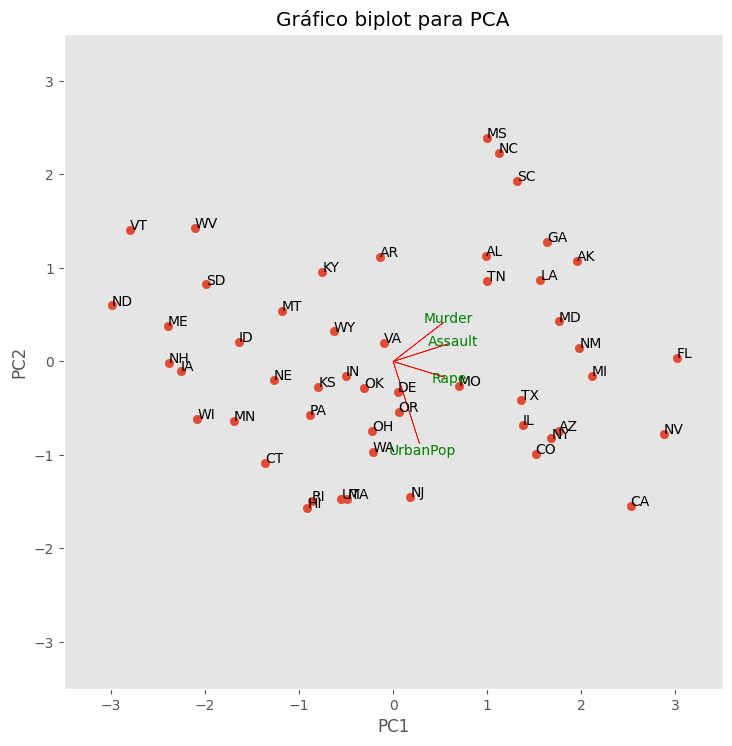

In [29]:
plt.figure(figsize=(8.5,8.5))
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("Gr√°fico biplot para PCA")
plt.grid()
biplot(datos_scaled, PCA().fit(datos_scaled),
       original_dim_labels=datos.columns,
       point_labels=USArrests['StateAbbrv'])

Vemos como las variables `UrbanPop` y `Murder`no tienen pr√°cticamente correlaci√≥n. Igualmente `Murder`y `Assault`s√≠ que est√°n correladas.

Visualmente es complicado determinar cuantas agrupaciones tenemos, usaremos el m√©todo silhouette que identifica el n√∫mero √≥ptimo de clusters.

In [ ]:
# M√©todo silhouette para identificar el n√∫mero √≥ptimo de clusters (ahora con los coeficientes de la PCA)
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 42
    )
    cluster_labels = modelo_kmeans.fit_predict(X_trans)
    silhouette_avg = silhouette_score(X_trans, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evoluci√≥n de media de los √≠ndices silhouette (PCA)")
ax.set_xlabel('N√∫mero clusters')
ax.set_ylabel('Media √≠ndices silhouette');

Parece que el n√∫mero ideal de clusters es de 2, pero 4 tampoco es un mal resultado. Elegimos 4 para que nos d√© m√°s juego a la hora del an√°lisis final. Vamos a ver el resultado con un n√∫mero de clusters de 4 y los m√©todos KMeans y DBSCAN.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Clustering Kmeans

y_predict_Kmeans = KMeans(n_clusters=4, n_init=25, random_state=42).fit_predict(X=X_trans)

for i in np.unique(y_predict_Kmeans):
    ax[0].scatter(
        x = X_trans[y_predict_Kmeans == i, 0],
        y = X_trans[y_predict_Kmeans == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )
ax[0].set_title('Clusters encontrados con K-Means')
ax[0].legend();

# Clustering DBSCAN

modelo_dbscan = DBSCAN(eps = 0.6, min_samples  = 5, metric = 'euclidean')
y_predict = modelo_dbscan.fit(X=X_trans)

labels = modelo_dbscan.labels_
ax[1].scatter(
    x = X_trans[:, 0],
    y = X_trans[:, 1],
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)


# Los outliers se identifican con el label -1
ax[1].scatter(
    x = X_trans[labels == -1, 0],
    y = X_trans[labels == -1, 1],
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax[1].set_title(f'DBSCAN (clusters = {len(set(labels)) - (1 if -1 in labels else 0)})')
ax[1].legend();


Ahora, nuestro inter√©s es caracterizar estos cuatros grupos que nos han salido usando alguna estad√≠sticas descriptiva.

In [ ]:
datos2 = datos.copy()
datos2["Cluster"]=y_predict_Kmeans

aux=datos2.columns.tolist()
aux[0:len(aux)-1]

for col in aux[0:len(aux)-1]:
    sns.boxplot(data=datos2, x="Cluster", y=col, fill=False, gap=.1)
    plt.title(f"Boxplot de la variable {col}")
    plt.show()
#    grid.map(plt.hist, cluster,color='red')

¬øPodemos sacar conclusiones?

# GMMs: Gaussian mixture models

Un Gaussian Mixture model es un modelo probabil√≠stico en el que se considera que las observaciones siguen una distribuci√≥n probabil√≠stica formada por la combinaci√≥n de m√∫ltiples distribuciones normales (componentes). En su aplicaci√≥n al clustering, puede entenderse como una generalizaci√≥n de K-means con la que, en lugar de asignar cada observaci√≥n a un √∫nico cluster, se obtiene una probabilidad de pertenencia a cada uno.

Para estimar los par√°metros que definen la funci√≥n de distribuci√≥n de cada cluster (media y matriz de covarianza) se recurre al algoritmo de *Expectation-Maximization* (EM). Una vez aprendidos los par√°metros, se puede calcular la probabilidad que tiene cada observaci√≥n de pertenecer a cada cluster y asignarla a aquel con mayor probabilidad.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gr√°ficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuraci√≥n warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Simulaci√≥n de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 300,
        n_features   = 2,
        centers      = 4,
        cluster_std  = 0.60,
        shuffle      = True,
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = 'white',
    marker    = 'o',
    edgecolor = 'black',
)
ax.set_title('Datos simulados');

Con la clase `sklearn.mixture.GaussianMixture` de Scikit-Learn se pueden entrenar modelos de GMMs utilizando el algoritmo expectation-maximization (EM) . Entre sus par√°metros destacan:

- `n_components`: n√∫mero de componentes (en este caso clusters) que forman el modelo.

- `covariance_type`: tipo de matriz de covarianza (‚Äòfull‚Äô (default), ‚Äòtied‚Äô, ‚Äòdiag‚Äô, ‚Äòspherical‚Äô).

- `max_iter`: n√∫mero m√°ximo de iteraciones permitidas.

- `random_state`: semilla para garantizar la reproducibilidad de los resultados.

In [ ]:
# Modelo
# ==============================================================================
modelo_gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
modelo_gmm.fit(X=X)

El objeto devuelto por GaussianMixture contiene entre otros datos: el peso de cada componente (cluster) en el modelo (`weights_`), su media (`means_`) y matriz de covarianza (`covariances_`).La estructura de esta √∫ltima depende del tipo de matriz empleada en el ajuste del modelo (`covariance_type`).

In [ ]:
# Media de cada componente
modelo_gmm.means_

In [ ]:
# Matriz de covarianza de cada componente
modelo_gmm.covariances_

Una vez entrenado el modelo GMMs, se puede predecir la probabilidad que tiene cada observaci√≥n de pertenecer a cada una de las componentes (clusters). Para obtener la clasificaci√≥n final, se asigna a la componente con mayor probabilidad.

In [ ]:
# Probabilidades
# ==============================================================================
# Cada fila es una observaci√≥n y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
probabilidades = modelo_gmm.predict_proba(X)
probabilidades

In [ ]:
# Clasificaci√≥n (asignaci√≥n a la componente de mayor probabilidad)
# ==============================================================================
# Cada fila es una observaci√≥n y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
clasificacion = modelo_gmm.predict(X)
clasificacion

In [ ]:
# Representaci√≥n gr√°fica
# ==============================================================================
# Codigo obtenido de:
# https://github.com/amueller/COMS4995-s20/tree/master/slides/aml-14-clustering-mixture-models
def make_ellipses(gmm, ax):
    for n in range(gmm.n_components):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)

        for i in range(1,3):
            ell = mpl.patches.Ellipse(gmm.means_[n], i*v[0], i*v[1],
                                      180 + angle, color="blue")
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.1)
            ax.add_artist(ell)


fig, axs = plt.subplots(1, 2, figsize=(12, 3.84))

# Distribuci√≥n de probabilidad de cada componente
for i in np.unique(clasificacion):
    axs[0].scatter(
        x = X[clasificacion == i, 0],
        y = X[clasificacion == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

make_ellipses(modelo_gmm, ax = axs[0])
axs[0].set_title('Distribuci√≥n de prob. de cada componente')
axs[0].legend()

# Distribuci√≥n de probabilidad del modelo completo
xs = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
ys = np.linspace(min(X[:, 1]), max(X[:, 1]), 1000)
xx, yy = np.meshgrid(xs, ys)
scores = modelo_gmm.score_samples(np.c_[xx.ravel(), yy.ravel()], )
axs[1].scatter(X[:, 0], X[:, 1], s=5, alpha=.6, c=plt.cm.tab10(clasificacion))
scores = np.exp(scores) # Las probabilidades est√°n en log
axs[1].contour(
    xx, yy, scores.reshape(xx.shape),
    levels=np.percentile(scores, np.linspace(0, 100, 10))[1:-1]
)
axs[1].set_title('Distribuci√≥n de prob. del modelo completo');

## N√∫mero de clusters
Dado que los modelos GMM son modelos probabil√≠sticos, se puede recurrir a m√©tricas como el Akaike information criterion (AIC) o Bayesian information criterion (BIC) para identificar c√≥mo de bien se ajustan los datos observados a modelo creado.

In [ ]:
n_components = range(1, 21)
valores_bic = []
valores_aic = []

for i in n_components:
    modelo = GaussianMixture(n_components=i, covariance_type="full")
    modelo = modelo.fit(X)
    valores_bic.append(modelo.bic(X))
    valores_aic.append(modelo.aic(X))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(n_components, valores_bic, label='BIC')
ax.plot(n_components, valores_aic, label='AIC')
ax.set_title("Valores BIC y AIC")
ax.set_xlabel("N√∫mero componentes")
ax.legend();

In [ ]:
print(f"N√∫mero √≥ptimo acorde al BIC: {range(1, 21)[np.argmin(valores_bic)]}")
print(f"N√∫mero √≥ptimo acorde al AIC: {range(1, 21)[np.argmin(valores_aic)]}")